In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
from sklearn.decomposition import PCA
pca = PCA( whiten=True)

In [4]:
pca.fit(train.iloc[:,1:])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=True)

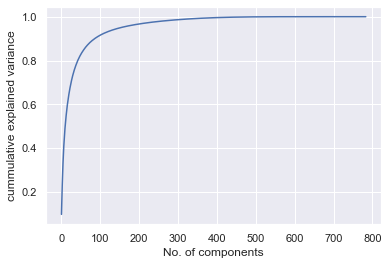

In [5]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of components')
plt.ylabel('cummulative explained variance');

In [6]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=430, whiten=True, random_state=42)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(train.iloc[:,1:], train['label'])

In [31]:
xtrain = pca.fit_transform(xtrain)
xtest = pca.fit_transform(xtest)

In [32]:
svc = SVC(kernel='rbf', class_weight='balanced')

In [33]:
svc.fit(xtrain, ytrain)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
ypred = svc.predict(xtest)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1057
           1       0.79      0.84      0.82      1135
           2       0.30      0.49      0.37      1099
           3       0.32      0.34      0.33      1108
           4       0.47      0.53      0.50      1024
           5       0.26      0.24      0.25       921
           6       0.33      0.15      0.21      1000
           7       0.58      0.50      0.53      1064
           8       0.47      0.47      0.47      1036
           9       0.36      0.32      0.34      1056

    accuracy                           0.47     10500
   macro avg       0.47      0.46      0.46     10500
weighted avg       0.47      0.47      0.46     10500

